In [33]:
from sklearn.datasets import load_digits
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [19]:
a = load_digits()
df = pd.DataFrame(a.data,columns = a.feature_names)
df["target"] = a.target
df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


In [75]:
xtrain,xtest,ytrain,ytest = train_test_split(df.drop("target",axis = 1),df.target)
b = []
for i in range(1,11):
    model = KNeighborsClassifier(i,weights = "distance")
    model.fit(xtrain,ytrain)
    b.append(model.score(xtest,ytest))
print(b)


[0.9866666666666667, 0.9866666666666667, 0.9911111111111112, 0.9911111111111112, 0.9933333333333333, 0.9933333333333333, 0.9911111111111112, 0.9911111111111112, 0.9866666666666667, 0.9911111111111112]


In [76]:
param = {"n_neighbors":[i for i in range(1,11)]}
clf = GridSearchCV(KNeighborsClassifier(weights = "distance"),param,cv = 10,return_train_score=False)
clf.fit(df.drop("target",axis = 1),df.target)
print(f"Best Score is {clf.best_score_} and best parameter is {clf.best_params_['n_neighbors']}")


Best Score is 0.977191185599007 and best parameter is 4


In [77]:
mod = KNeighborsClassifier(clf.best_params_['n_neighbors'])
mod.fit(xtrain,ytrain)
cm = confusion_matrix(ytest,mod.predict(xtest))
cm

array([[45,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 47,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 44,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 47,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 40,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 46,  0,  0,  0,  2],
       [ 0,  0,  0,  0,  0,  0, 52,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 44,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0, 40,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 42]])

<Axes: >

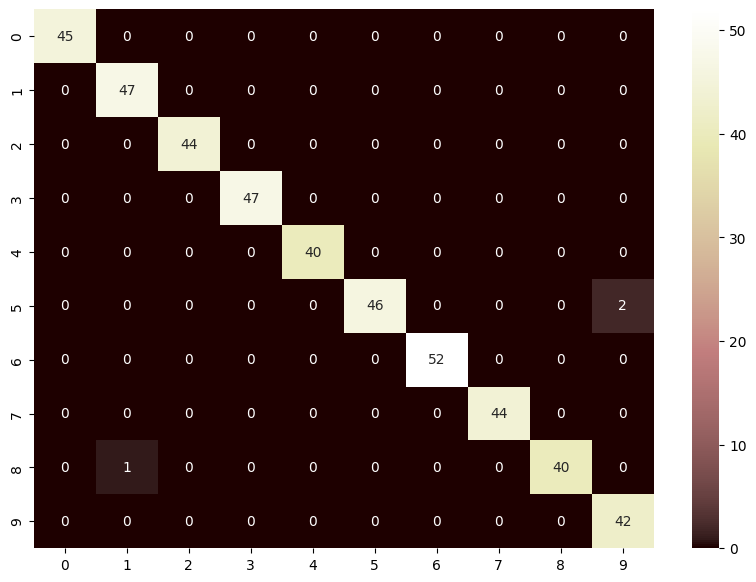

In [78]:
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot = True,cmap="pink")


In [79]:
print(classification_report(ytest,mod.predict(xtest)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       0.98      1.00      0.99        47
           2       1.00      1.00      1.00        44
           3       1.00      1.00      1.00        47
           4       1.00      1.00      1.00        40
           5       1.00      0.96      0.98        48
           6       1.00      1.00      1.00        52
           7       1.00      1.00      1.00        44
           8       1.00      0.98      0.99        41
           9       0.95      1.00      0.98        42

    accuracy                           0.99       450
   macro avg       0.99      0.99      0.99       450
weighted avg       0.99      0.99      0.99       450

